#Baseline
https://www.tensorflow.org/tutorials/load_data/images

#Imports

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Rescaling
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import plot_model


import matplotlib.pyplot as plt
%matplotlib inline

#import pydicom as dicom
#! pip install pydicom

#Baixando a DB
Colocando todos os X_NO em um array e criando um Y_NO,
Colocando todos os X_YES em um array e criando um Y_YES,
Concatenando X_NO com X_YES para criar X, o mesmo para Y,
Seperando em test e train.

In [ ]:
!gdown http://www.univasf.edu.br/~rosalvo.oliveira/BasePedro.zip

Downloading...
From: http://www.univasf.edu.br/~rosalvo.oliveira/BasePedro.zip
To: /content/BasePedro.zip
100% 15.8M/15.8M [00:11<00:00, 1.33MB/s]


In [ ]:
!unzip /content/BasePedro.zip

In [ ]:
train_data = image_dataset_from_directory(
    "/content/brain_tumor_dataset",
     labels='inferred',
     validation_split=0.25,
     subset="training",
     seed=123,
     batch_size = 32,
     color_mode = "grayscale"
     )

Found 253 files belonging to 2 classes.
Using 190 files for training.


In [ ]:
val_data = image_dataset_from_directory(
    "/content/brain_tumor_dataset",
     labels='inferred',
     validation_split=0.25,
     subset="validation",
     seed=123,
     batch_size = 32,
     color_mode = "grayscale"
)

Found 253 files belonging to 2 classes.
Using 63 files for validation.


In [ ]:
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Normalizando e Pegando o tamanho de entrada

In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 1)
(32,)


In [ ]:
normalization_layer = Rescaling(1./255)

normalized_data = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_data))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99898905


#Criando o Modelo

In [ ]:
ins = image_batch.shape[1:]

model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=ins))

model.add(Conv2D(32, (3,3), padding="same", strides = (2,2), activation="relu"))

model.add(Conv2D(64, (3,3), padding="same", strides = (2,2), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 dense (Dense)               (None, 32, 32, 128)       8320      
                                                        

In [ ]:
opt = optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

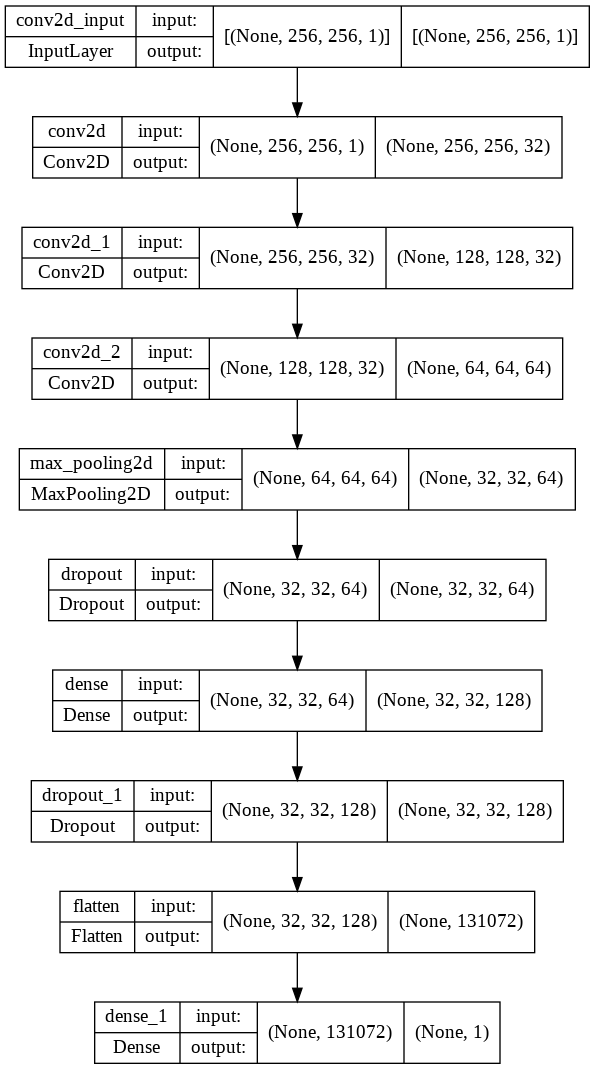

In [ ]:
plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False)

# Rodando com 20 epochs

In [ ]:
run_hist = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
6/6 [==============================] - 16s 2s/step - loss: 37.6502 - accuracy: 0.5263 - val_loss: 15.0918 - val_accuracy: 0.6032
Epoch 2/20
6/6 [==============================] - 15s 2s/step - loss: 4.2826 - accuracy: 0.6895 - val_loss: 2.8134 - val_accuracy: 0.5397
Epoch 3/20
6/6 [==============================] - 15s 2s/step - loss: 1.9503 - accuracy: 0.6947 - val_loss: 1.3277 - val_accuracy: 0.7460
Epoch 4/20
6/6 [==============================] - 14s 2s/step - loss: 0.8068 - accuracy: 0.7737 - val_loss: 1.3335 - val_accuracy: 0.7778
Epoch 5/20
6/6 [==============================] - 14s 2s/step - loss: 0.3518 - accuracy: 0.8632 - val_loss: 1.0358 - val_accuracy: 0.7778
Epoch 6/20
6/6 [==============================] - 14s 2s/step - loss: 0.7809 - accuracy: 0.8053 - val_loss: 1.3912 - val_accuracy: 0.7460
Epoch 7/20
6/6 [==============================] - 14s 2s/step - loss: 0.7594 - accuracy: 0.7526 - val_loss: 2.2457 - val_accuracy: 0.7302
Epoch 8/20
6/6 [================

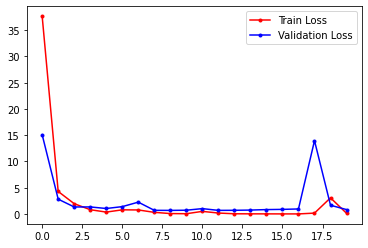

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#Rodando com 12 epochs

In [ ]:
run_hist = model.fit(train_data, validation_data=val_data, epochs=12)

Epoch 1/12
6/6 [==============================] - 14s 2s/step - loss: 14.2873 - accuracy: 0.6211 - val_loss: 5.2901 - val_accuracy: 0.3968
Epoch 2/12
6/6 [==============================] - 14s 2s/step - loss: 2.7511 - accuracy: 0.6632 - val_loss: 0.9525 - val_accuracy: 0.7778
Epoch 3/12
6/6 [==============================] - 13s 2s/step - loss: 0.5812 - accuracy: 0.8000 - val_loss: 1.6473 - val_accuracy: 0.4921
Epoch 4/12
6/6 [==============================] - 13s 2s/step - loss: 0.5902 - accuracy: 0.8211 - val_loss: 0.5723 - val_accuracy: 0.7460
Epoch 5/12
6/6 [==============================] - 13s 2s/step - loss: 0.3904 - accuracy: 0.8737 - val_loss: 0.6141 - val_accuracy: 0.8095
Epoch 6/12
6/6 [==============================] - 13s 2s/step - loss: 0.1161 - accuracy: 0.9579 - val_loss: 0.5608 - val_accuracy: 0.8095
Epoch 7/12
6/6 [==============================] - 13s 2s/step - loss: 0.0712 - accuracy: 0.9789 - val_loss: 0.6540 - val_accuracy: 0.8413
Epoch 8/12
6/6 [=================

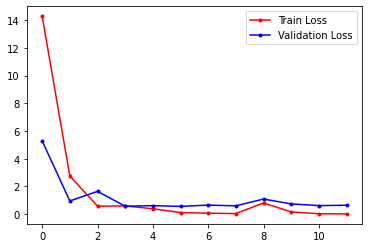

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

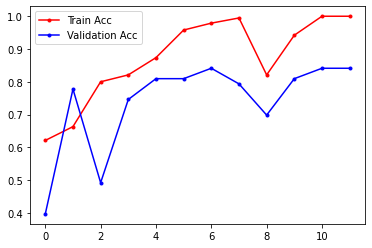

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["accuracy"],'r', marker='.', label="Train Acc")
ax.plot(run_hist.history["val_accuracy"],'b', marker='.', label="Validation Acc")
ax.legend()